In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision
import torch.optim as optim
import pytorch_lightning as pl
import copy
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")
print(device)

cuda:0


In [4]:
classes=['Covid','No Covid']
num_classes=2
batch_size=4

In [5]:
# reshape all images to 64x64 and apply tensor transformation
dataset = torchvision.datasets.ImageFolder(root="./Full",transform=transforms.Compose([
                                                            transforms.ToTensor(),
                                                            transforms.Resize([227,227])
                                                            # transforms.Grayscale(num_output_channels=1)
                                                            ]))
# testset = torchvision.datasets.ImageFolder(root="./xray",train=False,transform=transforms.Compose([transforms.Resize([300,305]),transforms.ToTensor()]))
# testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [6]:
print(len(dataset))
trainset,testset=torch.utils.data.random_split(dataset,[round(0.8*len(dataset)),round(0.2*len(dataset))],generator=torch.Generator().manual_seed(42))
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False)
print(len(trainset)/batch_size,len(testset)/batch_size)

8088
1617.5 404.5


In [7]:
class CNN(nn.Module):
    def get_first_FC_Layer(self,x):
            x=self.representation_network(x).flatten(1)
            x=self.classification_network[0](x)
            return x;
    def get_Representation_Net(self,x):
            x=self.representation_network(x).flatten(1)
            return  x;
    def __init__(self):
        super(CNN,self).__init__()
        self.representation_network=nn.Sequential(
            nn.Conv2d(3,32,3), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2,stride=3),
            nn.Dropout(p=0.2),
            nn.Conv2d(32,32,3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=3),
            nn.Dropout(p=0.2),
            nn.Conv2d(32,64,3),
            nn.ReLU(),
            nn.Conv2d(64,64,3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=3),
            nn.Dropout(p=0.2),
        )
        self.classification_network=nn.Sequential(
            nn.Linear(3136,512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,1),
#             nn.Sigmoid()
        )
    def forward(self,x):
#         print(x.shape)
        x=self.representation_network(x)
#         print(x.shape)
        # flattening of the vector=> same dimension of first index(batch size) , everythign else is flattened(-1)
        x=x.view(x.size(0),-1)
#         print(x.shape)
        x=self.classification_network(x)
#         print(x.shape)
        return x

In [8]:
net = CNN()
net.load_state_dict(torch.load("CNN4.pth").state_dict())

<All keys matched successfully>

In [9]:
def evaluation(dataloader,model):
    model.eval()
    with torch.no_grad():
        total,correct=0,0
        for data in dataloader:
            inputs,labels=data
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
    #         print(outputs)
    #         print(outputs,labels)
            m = nn.Sigmoid()
            outputs=m(outputs)
            pred=outputs>=0.5
            pred=pred.flatten()
            total+=labels.size(0)
            # labels=torch.add(labels,-1)
            # print(pred,labels)
    #         print(list(map(lambda a: classes[a],pred)),list(map(lambda a: classes[a],labels)))
            correct+=(pred==labels).sum().item()
    print(correct,total)
    model.train()
    return 100*correct/total

In [10]:
%%notify -m "Completed"

X_Train=np.empty((0,512))
Y_Train=np.empty((0,batch_size))
print(X_Train.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train=np.append(X_Train,FCLayer,axis=0)
    Y_Train=np.append(Y_Train,labels.numpy())
print(X_Train.shape,Y_Train.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 660
Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699


Done with the batch: 988
Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 102

Done with the batch: 1304
Done with the batch: 1305
Done with the batch: 1306
Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with th

<IPython.core.display.Javascript object>

In [11]:
%%notify -m "Completed"
X_Test=np.empty((0,512))
Y_Test=np.empty((0,batch_size))
print(X_Test.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test=np.append(X_Test,FCLayer,axis=0)
    Y_Test=np.append(Y_Test,labels.numpy())
print(X_Test.shape,Y_Test.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


<IPython.core.display.Javascript object>

In [12]:
%%notify -m "Completed"
X_Train_FeatureMap=np.empty((0,3136))
Y_Train_FeatureMap=np.empty((0,batch_size))
print(X_Train_FeatureMap.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featureMap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train_FeatureMap=np.append(X_Train_FeatureMap,featureMap,axis=0)
    Y_Train_FeatureMap=np.append(Y_Train_FeatureMap,labels.numpy())
print(X_Train_FeatureMap.shape,Y_Train_FeatureMap.shape)

(0, 3136)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the ba

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 660
Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699


Done with the batch: 988
Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 102

Done with the batch: 1304
Done with the batch: 1305
Done with the batch: 1306
Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with th

<IPython.core.display.Javascript object>

In [13]:
%%notify -m "Completed"
X_Test_FeatureMap=np.empty((0,3136))
Y_Test_FeatureMap=np.empty((0,batch_size))
print(X_Test_FeatureMap.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featuremap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test_FeatureMap=np.append(X_Test_FeatureMap,featuremap,axis=0)
    Y_Test_FeatureMap=np.append(Y_Test_FeatureMap,labels.numpy())
print(X_Test_FeatureMap.shape,Y_Test_FeatureMap.shape)

(0, 3136)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the ba

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


<IPython.core.display.Javascript object>

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import KFold

In [17]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-2,0.1,1,10],
                     'C': [0.001,0.1,1, 10, 100],
}
# tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3],
#                      'C': [0.001],
#                    }
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train, Y_Train.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 1/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.501 total time=  13.9s
[CV 2/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 2/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  13.9s
[CV 3/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 3/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  13.6s
[CV 4/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 4/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  13.5s
[CV 5/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 5/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.502 total time=  13.8s
[CV 1/5; 2/25] START C=0.001, gamma=0.01, kernel=rbf............................
[CV 1/5; 2/25] END C=0.001,

[CV 1/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.926 total time=  13.2s
[CV 2/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 2/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.919 total time=  13.2s
[CV 3/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 3/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.908 total time=  13.2s
[CV 4/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 4/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.910 total time=  13.5s
[CV 5/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 5/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.919 total time=  13.2s
[CV 1/5; 12/25] START C=1, gamma=0.01, kernel=rbf...............................
[CV 1/5; 12/25] END C=1, gamma=0.01, kernel=rbf;, score=0.543 total time=  14.4s
[CV 2/5; 12/25] START C=1, gamma=0.01, kernel=rbf...............................
[CV 2/5; 12/25] END C=1

[CV 2/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.917 total time=  15.6s
[CV 3/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 3/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.911 total time=  15.7s
[CV 4/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 4/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.911 total time=  14.7s
[CV 5/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 5/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.916 total time=  19.3s
[CV 1/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 1/5; 22/25] END C=100, gamma=0.01, kernel=rbf;, score=0.550 total time=  21.1s
[CV 2/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 2/5; 22/25] END C=100, gamma=0.01, kernel=rbf;, score=0.549 total time=  21.7s
[CV 3/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 3/5; 22/

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [15]:
def k_fold_cv_svm(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        clf=SVC(C=1,kernel='rbf',gamma=0.001)
        clf.fit(X_train,y_train.ravel())
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [16]:
clf=k_fold_cv_svm(X_Train,Y_Train.ravel())
y_pred=clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Accuracy: 91.9629057187017
FOLD 1
--------------------------------
Accuracy: 92.42658423493046
FOLD 2
--------------------------------
Accuracy: 90.88098918083463
FOLD 3
--------------------------------
Accuracy: 89.64451313755795
FOLD 4
--------------------------------
Accuracy: 92.11746522411129
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 91.9629057187017 %
Fold 1: 92.42658423493046 %
Fold 2: 90.88098918083463 %
Fold 3: 89.64451313755795 %
Fold 4: 92.11746522411129 %
Average: 91.4064914992272 %
Accuracy:  0.9004944375772559
Precision:  0.9184713375796179
Recall:  0.8814180929095354
F1-Score:  0.8995633187772926
AUC:  0.9007090464547678


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
def k_fold_cv_dtree(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        decision_tree = DecisionTreeClassifier(random_state=102)
        decision_tree = decision_tree.fit(X_train, y_train.ravel())
        y_pred = decision_tree.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del decision_tree
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return decision_tree

In [19]:
dtree=k_fold_cv_dtree(X_Train,Y_Train.ravel())
y_pred=dtree.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Accuracy: 88.79443585780525
FOLD 1
--------------------------------
Accuracy: 89.87635239567233
FOLD 2
--------------------------------
Accuracy: 91.112828438949
FOLD 3
--------------------------------
Accuracy: 90.1081916537867
FOLD 4
--------------------------------
Accuracy: 88.94899536321483
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 88.79443585780525 %
Fold 1: 89.87635239567233 %
Fold 2: 91.112828438949 %
Fold 3: 90.1081916537867 %
Fold 4: 88.94899536321483 %
Average: 89.76816074188562 %
Accuracy:  0.8677379480840544
Precision:  0.8552941176470589
Recall:  0.8887530562347188
F1-Score:  0.8717026378896884
AUC:  0.8675015281173594


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
def k_fold_cv_rforest(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
        random_forest = random_forest.fit(X_train, y_train.ravel())
        y_pred = random_forest.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del random_forest
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return random_forest

In [22]:
random_forest=k_fold_cv_rforest(X_Train,Y_Train.ravel())
y_pred=random_forest.predict(X_Test)
print(accuracy_score(Y_Test.ravel(),y_pred))
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Accuracy: 93.81761978361669
FOLD 1
--------------------------------
Accuracy: 94.97681607418856
FOLD 2
--------------------------------
Accuracy: 93.19938176197836
FOLD 3
--------------------------------
Accuracy: 93.04482225656878
FOLD 4
--------------------------------
Accuracy: 92.8129829984544
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 93.81761978361669 %
Fold 1: 94.97681607418856 %
Fold 2: 93.19938176197836 %
Fold 3: 93.04482225656878 %
Fold 4: 92.8129829984544 %
Average: 93.57032457496135 %
0.915327564894932
Accuracy:  0.915327564894932
Precision:  0.9077844311377246
Recall:  0.9266503667481663
F1-Score:  0.9171203871748337
AUC:  0.9152001833740832


In [23]:
import xgboost as xgb


In [24]:
def k_fold_cv_xgb(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        eval_set = [(X_train, y_train.ravel()), (X_test, y_test)]
        xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
        xg_cl.fit(X_train,y_train.ravel())
        y_pred = xg_cl.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del xg_cl
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return xg_cl

In [25]:
xg=k_fold_cv_xgb(X_Train,Y_Train.ravel())
y_pred=xg.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
[16:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 93.81761978361669
FOLD 1
--------------------------------
[16:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 94.51313755795981
FOLD 2
--------------------------------
[16:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
def k_fold_cv_mlp(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        clf = MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [28]:
clf=k_fold_cv_mlp(X_Train,Y_Train.ravel())
y_pred=clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test,y_pred))
print("Precision: ",precision_score(Y_Test,y_pred))
print("Recall: ",recall_score(Y_Test,y_pred))
print("F1-Score: ",f1_score(Y_Test,y_pred))
print("AUC: ",roc_auc_score(Y_Test,y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 1.04627535
Iteration 2, loss = 0.35743982
Iteration 3, loss = 0.29043270
Iteration 4, loss = 0.25751439
Iteration 5, loss = 0.21433634
Iteration 6, loss = 0.20474080
Iteration 7, loss = 0.19557845
Iteration 8, loss = 0.19939727
Iteration 9, loss = 0.17929793
Iteration 10, loss = 0.18539116
Iteration 11, loss = 0.17484194
Iteration 12, loss = 0.17146057
Iteration 13, loss = 0.22784455
Iteration 14, loss = 0.19989515
Iteration 15, loss = 0.16010523
Iteration 16, loss = 0.16833518
Iteration 17, loss = 0.15017041
Iteration 18, loss = 0.14985825
Iteration 19, loss = 0.14275761
Iteration 20, loss = 0.14600040
Iteration 21, loss = 0.16827932
Iteration 22, loss = 0.13749343
Iteration 23, loss = 0.13818642
Iteration 24, loss = 0.15403004
Iteration 25, loss = 0.14920024
Iteration 26, loss = 0.13259013
Iteration 27, loss = 0.12355478
Iteration 28, loss = 0.13045294
Iteration 29, loss = 0.12747265
Iteration 30, loss = 0.13256751
Iteration

Iteration 113, loss = 0.05807013
Iteration 114, loss = 0.05007084
Iteration 115, loss = 0.04865956
Iteration 116, loss = 0.05621921
Iteration 117, loss = 0.04974525
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 92.58114374034004
FOLD 2
--------------------------------
Iteration 1, loss = 1.11105398
Iteration 2, loss = 0.35257127
Iteration 3, loss = 0.25841358
Iteration 4, loss = 0.24597889
Iteration 5, loss = 0.22943631
Iteration 6, loss = 0.20618590
Iteration 7, loss = 0.20696873
Iteration 8, loss = 0.21277645
Iteration 9, loss = 0.22521274
Iteration 10, loss = 0.19793371
Iteration 11, loss = 0.17437052
Iteration 12, loss = 0.16519779
Iteration 13, loss = 0.15709044
Iteration 14, loss = 0.14822230
Iteration 15, loss = 0.16716049
Iteration 16, loss = 0.15460415
Iteration 17, loss = 0.15240691
Iteration 18, loss = 0.14034102
Iteration 19, loss = 0.13362322
Iteration 20, loss = 0.15429679
Iteration 21, loss = 0.13314645
Iteration 22, 

Iteration 95, loss = 0.05099664
Iteration 96, loss = 0.04993687
Iteration 97, loss = 0.06105140
Iteration 98, loss = 0.04818779
Iteration 99, loss = 0.06055438
Iteration 100, loss = 0.04602791
Iteration 101, loss = 0.04903943
Iteration 102, loss = 0.06499384
Iteration 103, loss = 0.06709023
Iteration 104, loss = 0.06235664
Iteration 105, loss = 0.05746339
Iteration 106, loss = 0.04988355
Iteration 107, loss = 0.06781740
Iteration 108, loss = 0.05095848
Iteration 109, loss = 0.07744804
Iteration 110, loss = 0.05119331
Iteration 111, loss = 0.04423731
Iteration 112, loss = 0.05059976
Iteration 113, loss = 0.03713970
Iteration 114, loss = 0.03937376
Iteration 115, loss = 0.04701500
Iteration 116, loss = 0.03887604
Iteration 117, loss = 0.03672795
Iteration 118, loss = 0.06144005
Iteration 119, loss = 0.05452525
Iteration 120, loss = 0.03619800
Iteration 121, loss = 0.03712226
Iteration 122, loss = 0.03589547
Iteration 123, loss = 0.03588457
Iteration 124, loss = 0.03167697
Iteration 125, 

In [29]:
from sklearn.decomposition import KernelPCA

Text(0, 0.5, 'cumulative explained variance')

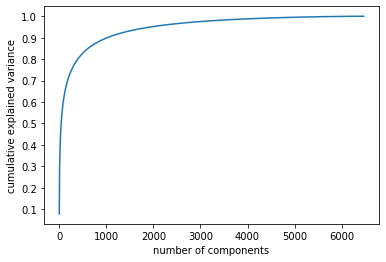

In [33]:
kpca = KernelPCA(kernel = 'rbf')
kpca_transform = kpca.fit_transform(X_Train_FeatureMap)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [30]:
kpca = KernelPCA(kernel = 'rbf',n_components=5000)
X_Train_Transformed_FeatureMap = kpca.fit_transform(X_Train_FeatureMap)
print(X_Train_Transformed_FeatureMap.shape)

(6470, 5000)


In [31]:
X_Test_Transformed_FeatureMap = kpca.transform(X_Test_FeatureMap)

print(X_Test_FeatureMap.shape,X_Test_Transformed_FeatureMap.shape)

(1618, 3136) (1618, 5000)


In [32]:
# %% notify -m "GridCV"
tuned_parameters = {'kernel': ['rbf'], 'gamma': [10,100],
                     'C': [10],
}
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 1/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.889 total time= 5.5min
[CV 2/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 2/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.877 total time= 3.3min
[CV 3/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 3/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.873 total time= 3.4min
[CV 4/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 4/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.865 total time= 3.4min
[CV 5/5; 1/2] START C=10, gamma=10, kernel=rbf..................................
[CV 5/5; 1/2] END ...C=10, gamma=10, kernel=rbf;, score=0.879 total time= 3.2min
[CV 1/5; 2/2] START C=10, gamma=100, kernel=rbf.................................
[CV 1/5; 2/2] END ..C=10, gamma=100, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'gamma': [10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [33]:
clf=k_fold_cv_svm(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 47.21792890262751
FOLD 1
--------------------------------
Accuracy: 50.61823802163833
FOLD 2
--------------------------------
Accuracy: 48.29984544049459
FOLD 3
--------------------------------
Accuracy: 50.23183925811438
FOLD 4
--------------------------------
Accuracy: 49.0726429675425
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 47.21792890262751 %
Fold 1: 50.61823802163833 %
Fold 2: 48.29984544049459 %
Fold 3: 50.23183925811438 %
Fold 4: 49.0726429675425 %
Average: 49.08809891808346 %
Accuracy:  0.5055624227441285
Precision:  0.5055624227441285
Recall:  1.0
F1-Score:  0.671592775041051
AUC:  0.5


In [34]:
dtree=k_fold_cv_dtree(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=dtree.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 74.42040185471407
FOLD 1
--------------------------------
Accuracy: 74.42040185471407
FOLD 2
--------------------------------
Accuracy: 74.0340030911901
FOLD 3
--------------------------------
Accuracy: 76.50695517774344
FOLD 4
--------------------------------
Accuracy: 76.12055641421948
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 74.42040185471407 %
Fold 1: 74.42040185471407 %
Fold 2: 74.0340030911901 %
Fold 3: 76.50695517774344 %
Fold 4: 76.12055641421948 %
Average: 75.10046367851623 %
Accuracy:  0.7991347342398022
Precision:  0.7952095808383234
Recall:  0.8117359413202934
F1-Score:  0.8033877797943133
AUC:  0.7989929706601466


In [35]:
xg=k_fold_cv_xgb(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=xg.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
[17:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 86.32148377125193
FOLD 1
--------------------------------
[17:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 86.70788253477589
FOLD 2
--------------------------------
[17:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

In [36]:
clf=k_fold_cv_mlp(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.68480250
Iteration 2, loss = 0.63679067
Iteration 3, loss = 0.56497698
Iteration 4, loss = 0.48132187
Iteration 5, loss = 0.40333556
Iteration 6, loss = 0.33814322
Iteration 7, loss = 0.28681517
Iteration 8, loss = 0.24687005
Iteration 9, loss = 0.21558592
Iteration 10, loss = 0.19075069
Iteration 11, loss = 0.17043570
Iteration 12, loss = 0.15387501
Iteration 13, loss = 0.13943684
Iteration 14, loss = 0.12742839
Iteration 15, loss = 0.11681116
Iteration 16, loss = 0.10775105
Iteration 17, loss = 0.09976791
Iteration 18, loss = 0.09269313
Iteration 19, loss = 0.08650507
Iteration 20, loss = 0.08089176
Iteration 21, loss = 0.07577716
Iteration 22, loss = 0.07124113
Iteration 23, loss = 0.06713541
Iteration 24, loss = 0.06331471
Iteration 25, loss = 0.05987519
Iteration 26, loss = 0.05673791
Iteration 27, loss = 0.05398818
Iteration 28, loss = 0.05117825
Iteration 29, loss = 0.04844598
Iteration 30, loss = 0.04620085
Iteration

Iteration 22, loss = 0.07213503
Iteration 23, loss = 0.06780895
Iteration 24, loss = 0.06400541
Iteration 25, loss = 0.06064320
Iteration 26, loss = 0.05745971
Iteration 27, loss = 0.05456696
Iteration 28, loss = 0.05193863
Iteration 29, loss = 0.04947723
Iteration 30, loss = 0.04715390
Iteration 31, loss = 0.04516361
Iteration 32, loss = 0.04287833
Iteration 33, loss = 0.04108872
Iteration 34, loss = 0.03941768
Iteration 35, loss = 0.03781091
Iteration 36, loss = 0.03630044
Iteration 37, loss = 0.03470303
Iteration 38, loss = 0.03336499
Iteration 39, loss = 0.03199963
Iteration 40, loss = 0.03080108
Iteration 41, loss = 0.02969322
Iteration 42, loss = 0.02854710
Iteration 43, loss = 0.02759543
Iteration 44, loss = 0.02654057
Iteration 45, loss = 0.02564169
Iteration 46, loss = 0.02479175
Iteration 47, loss = 0.02400833
Iteration 48, loss = 0.02308726
Iteration 49, loss = 0.02232818
Iteration 50, loss = 0.02161739
Iteration 51, loss = 0.02094229
Iteration 52, loss = 0.02023925
Iteratio

Iteration 51, loss = 0.02046986
Iteration 52, loss = 0.01975333
Iteration 53, loss = 0.01914232
Iteration 54, loss = 0.01850948
Iteration 55, loss = 0.01800644
Iteration 56, loss = 0.01749222
Iteration 57, loss = 0.01701322
Iteration 58, loss = 0.01659563
Iteration 59, loss = 0.01622212
Iteration 60, loss = 0.01568453
Iteration 61, loss = 0.01527694
Iteration 62, loss = 0.01490353
Iteration 63, loss = 0.01453104
Iteration 64, loss = 0.01412693
Iteration 65, loss = 0.01379275
Iteration 66, loss = 0.01349691
Iteration 67, loss = 0.01318711
Iteration 68, loss = 0.01287040
Iteration 69, loss = 0.01257820
Iteration 70, loss = 0.01236519
Iteration 71, loss = 0.01206629
Iteration 72, loss = 0.01185846
Iteration 73, loss = 0.01160409
Iteration 74, loss = 0.01138572
Iteration 75, loss = 0.01119034
Iteration 76, loss = 0.01100590
Iteration 77, loss = 0.01079326
Iteration 78, loss = 0.01057216
Iteration 79, loss = 0.01048909
Iteration 80, loss = 0.01024920
Iteration 81, loss = 0.01009319
Iteratio

In [37]:
random_forest=k_fold_cv_rforest(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=random_forest.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 74.1112828438949
FOLD 1
--------------------------------
Accuracy: 70.94281298299846
FOLD 2
--------------------------------
Accuracy: 74.96136012364761
FOLD 3
--------------------------------
Accuracy: 73.41576506955178
FOLD 4
--------------------------------
Accuracy: 73.1839258114374
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 74.1112828438949 %
Fold 1: 70.94281298299846 %
Fold 2: 74.96136012364761 %
Fold 3: 73.41576506955178 %
Fold 4: 73.1839258114374 %
Average: 73.32302936630603 %
Accuracy:  0.776885043263288
Precision:  0.8010540184453228
Recall:  0.7432762836185819
F1-Score:  0.7710843373493975
AUC:  0.7772631418092909
